In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from sklearn.decomposition import TruncatedSVD

# Combine all text data together and split it into six txt doucment

In [42]:
# Hillary_word_frequency = pd.read_csv("../cleanData/Hillary_word_frequency.csv")
# Trump_word_frequency = pd.read_csv("../cleanData/Trump_word_frequency.csv")

Trump_data = pd.read_csv("../rawTextData/Trumptweets_01-08-2021.csv")
Hillary2016_11_12 = pd.read_csv("../rawTextdata/2016_Hillary.csv")
Hillary2017_01_03 = pd.read_excel("../rawTextdata/2017_Hillary.xlsx")

/Users/junjiexie/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [43]:
from datetime import datetime

Trump_data.date = pd.to_datetime(Trump_data.date, format="%Y-%m-%d", errors='coerce')
Trump_data = Trump_data[(Trump_data.date < datetime(2017, 3, 1)) & (Trump_data.date > datetime(2016, 11, 1))]

In [44]:
Hillary2016_11_12.created_at = pd.to_datetime(Hillary2016_11_12["created_at"])
Hillary2017_01_03["data.created_at"] = pd.to_datetime(Hillary2017_01_03["data.created_at"])

In [45]:
def get_month_year(i):
    return str(i.year) + '-' + str(i.month)

In [46]:
Trump_data["label"] = [get_month_year(i) for i in Trump_data["date"]]
Hillary2016_11_12["label"] = [get_month_year(i) for i in Hillary2016_11_12["created_at"]]
Hillary2017_01_03["label"] = [get_month_year(i) for i in Hillary2017_01_03["data.created_at"]]
Hillary2017_01_03.rename(columns={"data.text": "text"}, inplace=True)

In [47]:
Hillary2017_01_03

,Unnamed: 0,data.created_at,data.id,text,meta.oldest_id,meta.newest_id,meta.result_count,label
0,1,2017-02-27 18:04:39+00:00,836275870343929861,Trump's own @DHSgov confirmed this weekend tha...,816425914850492416,836275870343929861,23,2017-2
1,2,2017-02-27 18:04:24+00:00,836275807077064704,"With threats &amp; hate crimes on rise, we sho...",816425914850492416,836275870343929861,23,2017-2
2,3,2017-02-25 21:28:39+00:00,835602432675610624,Congrats to @DNC chair @TomPerez &amp; deputy ...,816425914850492416,836275870343929861,23,2017-2
3,4,2017-02-24 18:44:49+00:00,835198816395526144,Let resistance plus persistence equal progress...,816425914850492416,836275870343929861,23,2017-2
4,5,2017-02-22 20:54:16+00:00,834506616586268676,"If you can't stand the heat, get out of the......",816425914850492416,836275870343929861,23,2017-2
5,6,2017-02-21 13:09:04+00:00,834027159148695552,"JCC threats, cemetery desecration &amp; online...",816425914850492416,836275870343929861,23,2017-2
6,7,2017-02-18 14:05:45+00:00,832954259046006784,"If you're studying global health, or just want...",816425914850492416,836275870343929861,23,2017-2
7,8,2017-02-15 17:48:13+00:00,831923081652404228,Thanks to Isolde Fair &amp; her classmates for...,816425914850492416,836275870343929861,23,2017-2
8,9,2017-02-14 05:41:26+00:00,831377792893849600,"Philippe's got his own way of saying things, b...",816425914850492416,836275870343929861,23,2017-2
9,10,2017-02-10 00:17:59+00:00,829846842150096896,3-0,816425914850492416,836275870343929861,23,2017-2


In [48]:
text1 = Trump_data[["text", "label"]]
text2 = Hillary2016_11_12[["text", "label"]]
text3 = Hillary2017_01_03[["text", "label"]]
all_text = pd.concat([text1, text2, text3])

In [49]:
all_text

,text,label
2763,Just met with General Petraeus--was very impre...,2016-11
2801,'Trump signs bill undoing Obama coal mining ru...,2017-2
28896,""".@FoxNews - """"Objectified"""" tonight at 10:00 ...",2016-12
29338,Happy #Hanukkah https://t.co/UvZwtykV1E,2016-12
33959,Trump promises special session to repeal Obama...,2016-11
...,...,...
18,'Hope Not Fear'\nIndeed. \nAnd what a beautifu...,2017-1
19,"Thanks for standing, speaking &amp; marching f...",2017-1
20,I'm here today to honor our democracy &amp; it...,2017-1
21,Indeed. Bill &amp; I have you in our thoughts ...,2017-1


In [50]:
# the word is too large to run, I have to select some of them
sentence = all_text["text"]

## I have tried and found that using stop_words in Tfidf to filter is not enough and should do more clean

In [51]:
import re

english_words = set(nltk.corpus.words.words())


def first_clean(text):
    rawData = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    return rawData


def clean_not_words(input):
    input = input.split()
    return [i for i in input if i in english_words and len(i) > 2]


def lemmed_word(input):
    lemmed = [WordNetLemmatizer().lemmatize(w) for w in input]
    return " ".join(lemmed)


first_clean_sentence = [first_clean(i) for i in sentence]
second_clean_sentence = [clean_not_words(i) for i in first_clean_sentence]
third_clean_sentence = [lemmed_word(i) for i in second_clean_sentence]

In [52]:
third_clean_sentence[:10]

['just met with general wa very',
 'trump bill undoing coal mining rule',
 'tonight enjoy',
 'happy',
 'trump special session repeal',
 '',
 'happy birthday',
 'happy birthday',
 'happy new year all many and those who have fought and lost badly they just don know what love',
 'are and for such funny watch they don have clue totally']

In [14]:
count = CountVectorizer(stop_words='english')
sentence_count = count.fit_transform(third_clean_sentence)

In [15]:
ColumnNames = count.get_feature_names()

In [16]:
DF_TF = pd.DataFrame(sentence_count.toarray(), columns=ColumnNames)

# Now we get the dataframe of word count in each tweet

In [17]:
DF_TF.head()

,abbas,ability,able,absolutely,accept,accepted,access,according,accumulation,accurately,...,write,writing,written,wrong,year,yes,yesterday,york,young,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## get the text-data

In [18]:
from copy import deepcopy
DF_TF2 = deepcopy(DF_TF)
DF_TF2["label"] = [i for i in all_text["label"]]
DF_TF2

,abbas,ability,able,absolutely,accept,accepted,access,according,accumulation,accurately,...,writing,written,wrong,year,yes,yesterday,york,young,zero,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-11
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-12
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-1
824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-1
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-1
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-1


In [19]:
DF_TF2.to_csv("../cleanData/data_text_cluster_right.csv")

# Find a suitable super parameter for K-means(Cluster)

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics

#k-means run too slow I use MiniBatchKMeans instead
# find n_k best
score_list = []  # Contour coefficient list
score_init = -1  # init Contour coefficient
for n_k in range(2, 12):
    model_kmeans = KMeans(n_clusters=n_k)  # model
    cluster_tmp = model_kmeans.fit_predict(DF_TF)  # train model
    score_tmp = metrics.silhouette_score(DF_TF, cluster_tmp)  # score get
    if score_tmp > score_init:  # if score better
        good_k = n_k  # storage it
        score_init = score_tmp
        good_model = model_kmeans
        good_cluster = cluster_tmp
    score_list.append([n_k, score_tmp])

print(score_list)
print('Best K is:{0} with average silhouette of {1}'.
      format(good_k, score_init.round(4)))

[[2, 0.05143623444528444], [3, 0.04833422634100743], [4, 0.049895771117158955], [5, 0.022587800265417655], [6, 0.01736815626430201], [7, 0.01114792173855153], [8, -7.041785743085366e-06], [9, 0.021195037976172518], [10, -0.00409093880715378], [11, 0.028939287532961957]]
Best K is:2 with average silhouette of 0.0514


In [21]:
score_df = pd.DataFrame(score_list, columns=["K_number", "silhouette_score"])

# The best K line plot of K-means

In [22]:
import plotly.express as px
import numpy as np

fig = px.line(x=score_df["K_number"], y=score_df["silhouette_score"], labels={'x': 'K_number', 'y': 'silhouette_score'},
              title='the silhouette_score picture of different k in K-means cluster', markers=True)
fig.show()

In [23]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=2)
cluster_tmp = model_kmeans.fit_predict(DF_TF)

In [24]:
DF_TF.shape

(828, 1527)

## Now we select n_cluster as 2

In [25]:
# reduce dimensions for visual
svd = TruncatedSVD(n_components=3, random_state=0)
text_2d = svd.fit_transform(DF_TF)

In [26]:
show_data = pd.DataFrame([text_2d[:, 0].tolist(), text_2d[:, 1].tolist(), text_2d[:, 2].tolist(), cluster_tmp.tolist()])
show_data = show_data.T
show_data.columns = ["x", "y", "z", "cluster"]

In [28]:
show_data["label"] = [i for i in all_text["label"]]

# Cluster class showing. It show each tweets belong to which kind of cluster

In [29]:
fig = px.scatter_3d(show_data, x="x", y="y", z="z", color="cluster",size_max=100)

fig.update_traces(marker_size=3)


fig.show()

# When K = 3, the visualization

In [31]:
# when k =3 , the clustering is not good
def show_kmeans_cluster(k:int):
    model_kmeans = KMeans(n_clusters=k)
    cluster_tmp = model_kmeans.fit_predict(DF_TF)
    show_data = pd.DataFrame([text_2d[:, 0].tolist(), text_2d[:, 1].tolist(), text_2d[:, 2].tolist(), cluster_tmp.tolist()])
    show_data = show_data.T
    show_data.columns = ["x", "y", "z", "cluster"]
    fig = px.scatter_3d(show_data, x="x", y="y", z="z", color="cluster",size_max=100)
    fig.update_traces(marker_size=3)
    fig.show()

show_kmeans_cluster(3)

# When K = 4, the visualization

In [32]:
# It seems that we can see these clusters clearly.
show_kmeans_cluster(4)

# Check the relationship between label and the class

In [36]:
show_data.sort_values("label",inplace=True)

In [37]:
def calculate_precent(date_list:list):
    storage = []
    for date in date_list:
        first = show_data[show_data["label"] == date]
        second = first[["cluster","label"]].groupby("cluster").count()
        for i in second["label"]:
            storage.append(i / len(show_data) * 1000)
    return storage
date_list = ["2016-11","2016-12","2017-1","2017-2"]
storage = calculate_precent(date_list)


In [41]:
need = []
for i in date_list:
 for j in range(2):
     need.append([i,j])
need_df = pd.DataFrame(need)
need_df.columns = ["label","class"]

In [42]:

fig = px.scatter(need_df, x="label", y="class", color="class", size=storage)

fig.show()

# Try to use AgglomerativeClustering compared with K-means

In [33]:
from sklearn.cluster import AgglomerativeClustering

score_list = []  # Contour coefficient list
score_init = -1 

for n_k in range(2, 12):
    model = AgglomerativeClustering(n_clusters=n_k)  # model
    cluster_tmp = model.fit_predict(DF_TF)  # train model
    score_tmp = metrics.silhouette_score(DF_TF, cluster_tmp)  # score get
    if score_tmp > score_init:  # if score better
        good_k = n_k  # storage it
        score_init = score_tmp
        good_model = model_kmeans
        good_cluster = cluster_tmp
    score_list.append([n_k, score_tmp])

print(score_list)
print('Best K is:{0} with average silhouette of {1}'.
      format(good_k, score_init.round(4)))

# But the best silhouette of k-means is 0.05 > 0.01. At the same time, the visualization of data showing that they are roundess shape, 
# which is suitable for k-means to cluster.

[[2, 0.010865191378902777], [3, 0.01506095669895735], [4, -0.033356076107427315], [5, -0.030319374891520864], [6, -0.027465605451555637], [7, -0.02457678682774608], [8, -0.02182504580272189], [9, -0.08050215836355734], [10, -0.07798070505257867], [11, -0.07532978716905527]]
Best K is:3 with average silhouette of 0.0151


# Dendrogram of hierarchical cluster

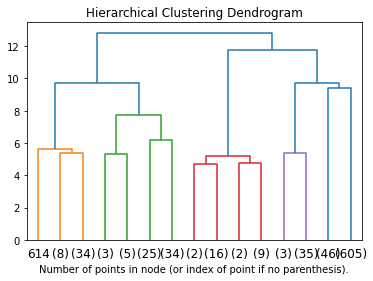

In [39]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    
    
model = AgglomerativeClustering(distance_threshold=0,n_clusters=None)  # model
model = model.fit(DF_TF) 
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Try to use DBSCAN compared with K-means

In [64]:
from sklearn.cluster import DBSCAN

model = DBSCAN()  # model
cluster_tmp = model.fit_predict(DF_TF)  # train model
score_tmp = metrics.silhouette_score(DF_TF, cluster_tmp)  # score get

print('DBSCAM with silhouette score is {}'.format(score_tmp))

# But the best silhouette of DBSCAN is negative. At the same time, the visualization of data showing that many points are outside the high density of area.
# Therefore, they may be seen as noise and lead to a terrible cluster result.

DBSCAM with silhouette score is -0.2952998702642682


In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# show the world cloud of each cluster

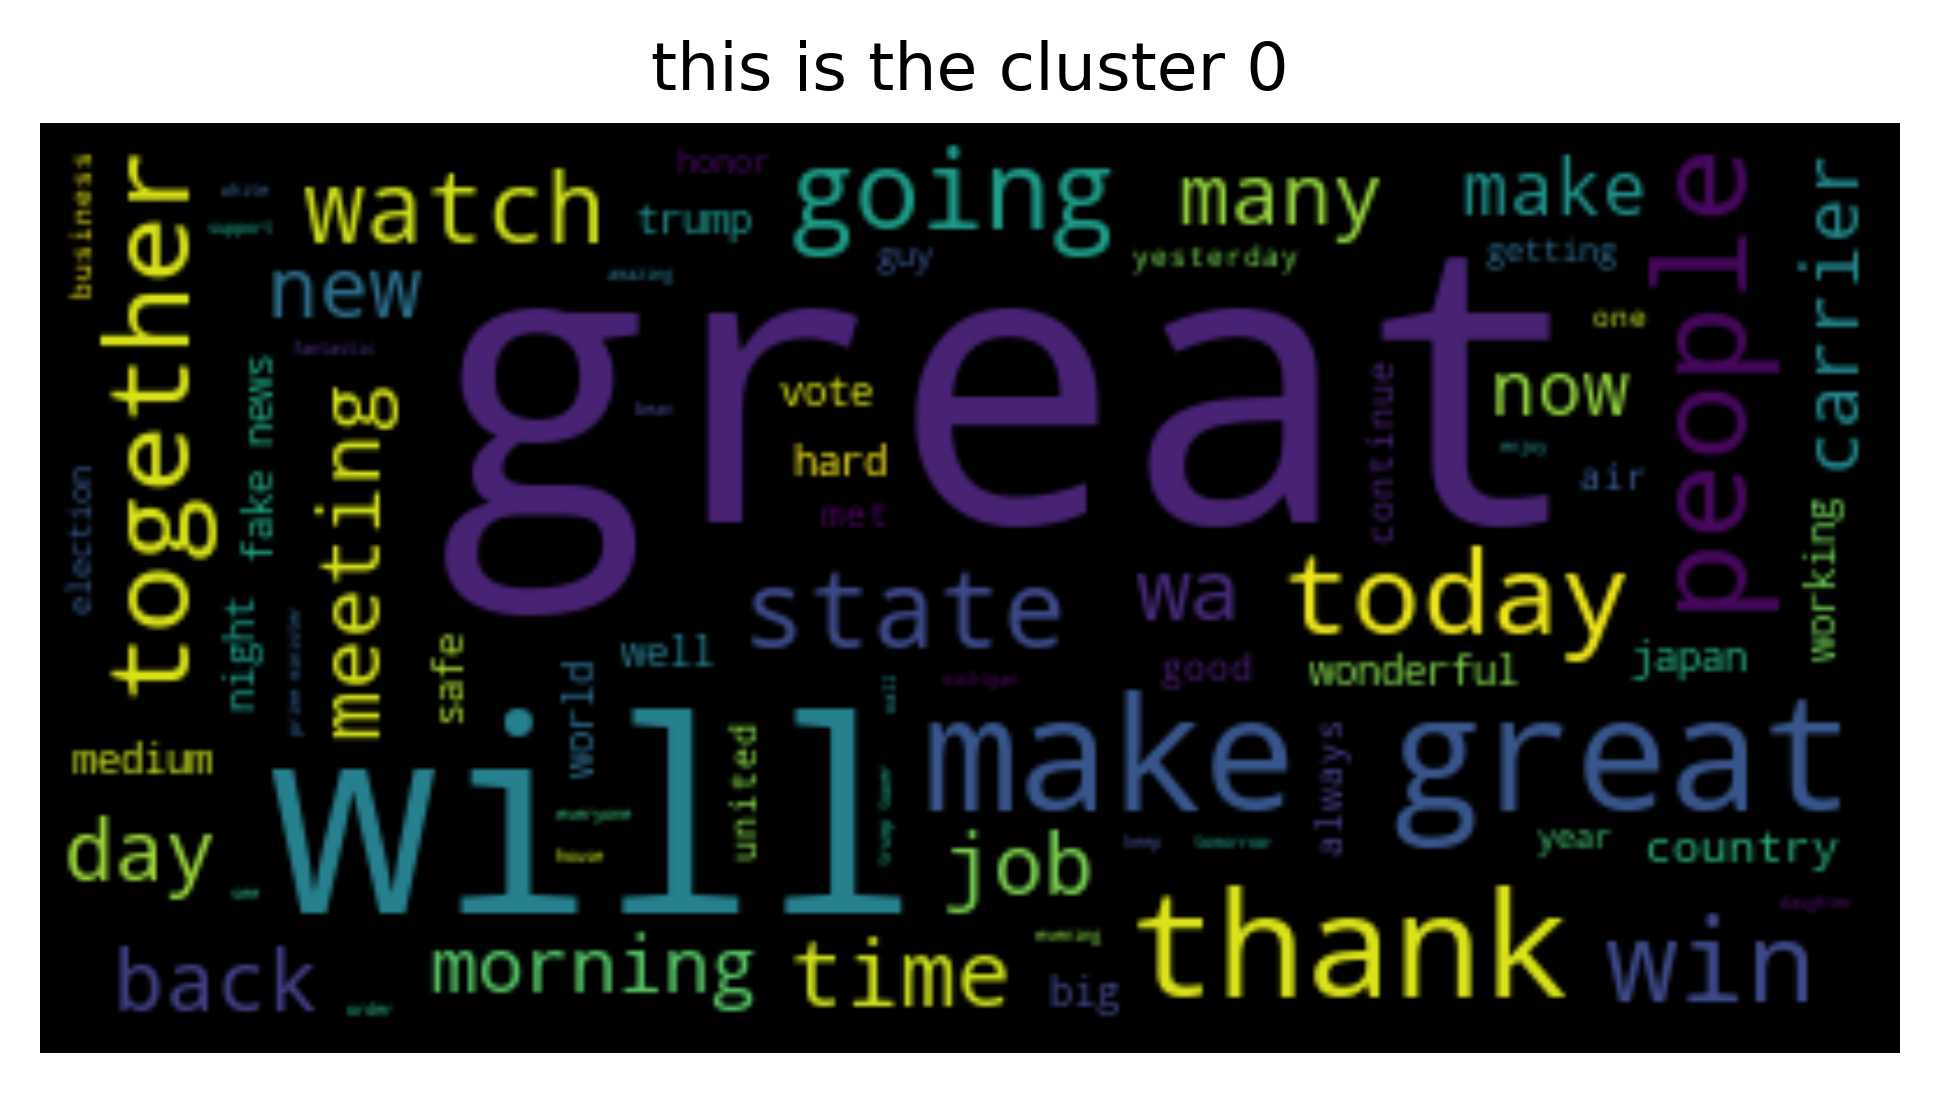

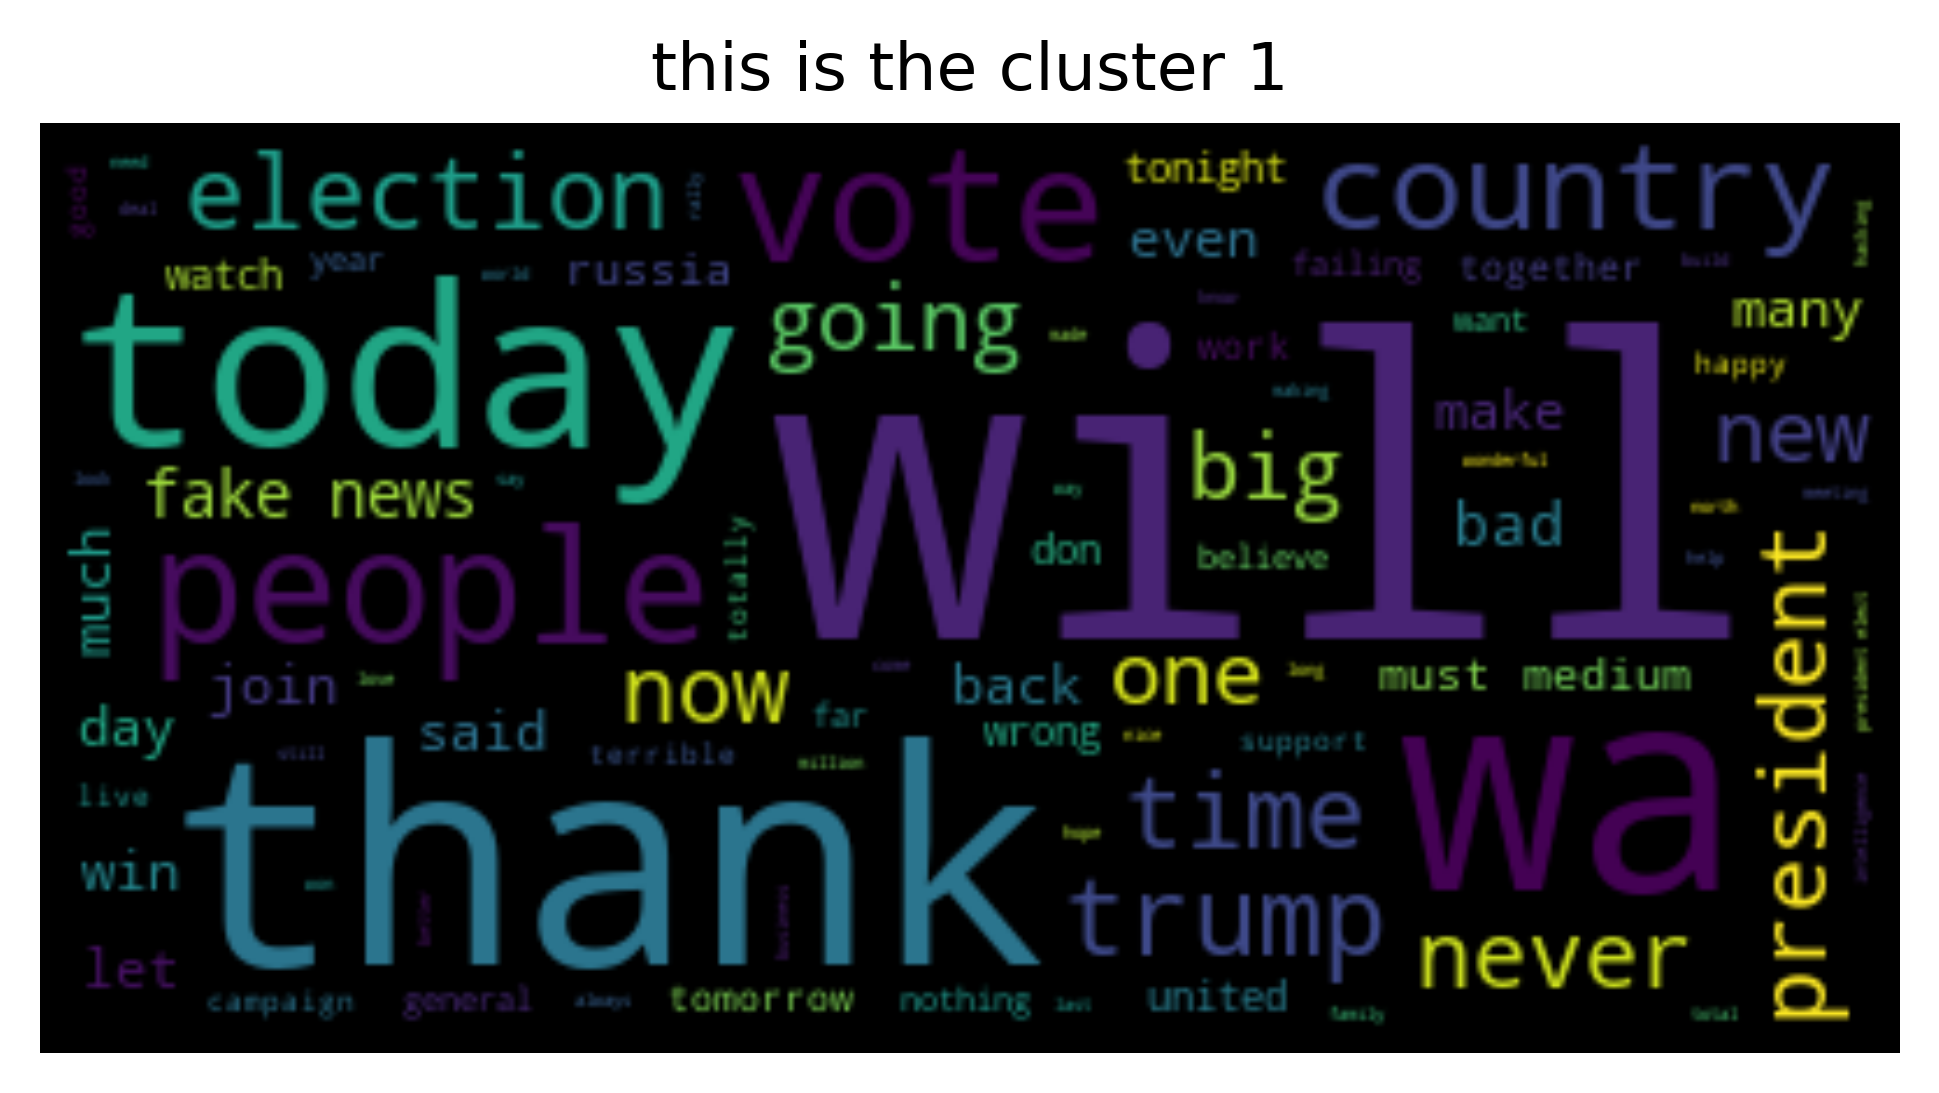

In [46]:
for i in range(2):

    need = np.argwhere(cluster_tmp == i)
    need_index = [i[0] for i in need]
    storage = []
    for count, value in enumerate(third_clean_sentence):
        if count in need_index:
            storage.append(value)
    wc = WordCloud(max_words=1000, margin=10,
                   random_state=1).generate(" ".join(storage))
    # store default colored image
    plt.rcParams['savefig.dpi'] = 1000  #图片像素
    plt.rcParams['figure.dpi'] = 400  #分辨率
    default_colors = wc.to_array()
    #     plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
    #                interpolation="bilinear")
    #     plt.axis("off")
    plt.figure()
    plt.title("this is the cluster {}".format(i))
    plt.imshow(default_colors, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [20]:
# display by groups


   Cluster         0         1         2         3         4         5  \
0        2  0.000769  0.006706  0.000703  0.019752 -0.011468  0.000606   
1        2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2        3  0.056627  0.196250 -0.121406  0.021613 -0.013852 -0.072828   
3        2  0.013234  0.067092 -0.023929  0.124512  0.178644 -0.077265   
4        2  0.001131  0.008064  0.003797  0.010872 -0.000083  0.003796   

          6  
0  0.001049  
1  0.000000  
2  0.045271  
3  0.269950  
4 -0.003157  
         Cluster
Cluster         
0             10
1             64
2            705
3             99
4             10
5             89
6             23
